In [18]:
import os 
import cv2
import glob
from bs4 import BeautifulSoup
import json
from collections import defaultdict

In [19]:
myf = open('train.txt', 'w')
dognames = os.listdir('./Images')
for i in dognames:
    dogphotos = os.listdir('./Images/'+i)
    myf.write(i)
    
    for j in dogphotos:
        photoname = './Annotation/' + i + '/' + os.path.splitext(j)[0]
        with open(photoname,'r') as f:
            soup = BeautifulSoup(f)
        xmin = int(soup.find('bndbox').find('xmin').get_text(strip=True))
        ymin = int(soup.find('bndbox').find('ymin').get_text(strip=True))
        xmax = int(soup.find('bndbox').find('xmax').get_text(strip=True))
        ymax = int(soup.find('bndbox').find('ymax').get_text(strip=True))
        
        height = int(soup.find('size').find('height').get_text(strip=True))
        width = int(soup.find('size').find('width').get_text(strip=True))
        #box_info = " %d,%d,%d,%d,%d,%d" % (
        #    xmin, ymin, xmax, ymax, height, width)
        box_info = " %f,%f,%f,%f" % (
            xmin/float(width), ymin/float(height), xmax/float(width), ymax/float(height))
        
        myf.write(box_info)
    myf.write('\n')
myf.close()

In [22]:
str.split(i,'-')[1]

'African_hunting_dog'

In [2]:
####这块只是做visualization用的，跑完上面的就OKOKOK
xmins = []; ymins = []; xmaxs = []; ymaxs = []
heights = []; widths = []
#myf = open('train.txt', 'w')
dognames = os.listdir('./Images')
for i in dognames:
    dogphotos = os.listdir('./Images/'+i)
    
    #myf.write(i)
    
    for j in dogphotos:
        photoname = './Annotation/' + i + '/' + os.path.splitext(j)[0]
        with open(photoname,'r') as f:
            soup = BeautifulSoup(f)
        xmin = int(soup.find('bndbox').find('xmin').get_text(strip=True))
        ymin = int(soup.find('bndbox').find('ymin').get_text(strip=True))
        xmax = int(soup.find('bndbox').find('xmax').get_text(strip=True))
        ymax = int(soup.find('bndbox').find('ymax').get_text(strip=True))
        
        height = int(soup.find('size').find('height').get_text(strip=True))
        width = int(soup.find('size').find('width').get_text(strip=True))
        box_info = " %d,%d,%d,%d,%d,%d" % (
            xmin, ymin, xmax, ymax, height, width)
        
        #myf.write(box_info)
        
        xmins.append(xmin)
        ymins.append(ymin)
        xmaxs.append(xmax)
        ymaxs.append(ymax)
        
        heights.append(height)
        widths.append(width)
    #myf.write('\n')
    
#myf.close()

In [3]:
height

240

In [4]:
import matplotlib.pyplot as plt
import numpy as np

pairs = [heights,widths]

plt.hist(heights)
plt.show()

<Figure size 640x480 with 1 Axes>

In [ ]:
#plt.hexbin(heights,widths) 

#plt.show() 


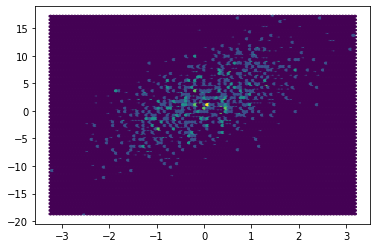

In [5]:
n = 1000
x = np.random.standard_normal(n) 
y = 2.0 + 3.0 * x + 4.0 * np.random.standard_normal(n) 
plt.hexbin(x,y) 

plt.show() 


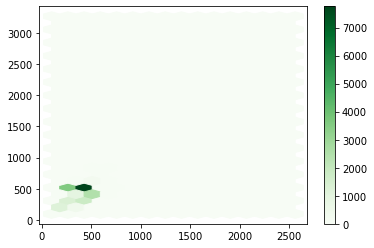

In [15]:
plt.hexbin(heights,widths,gridsize=(15,15), cmap=plt.cm.Greens) 
plt.colorbar()
plt.show() 


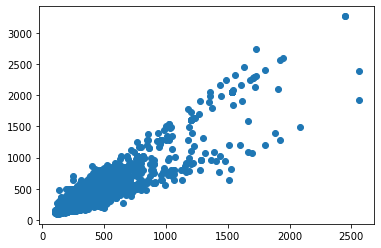

In [16]:
plt.scatter(heights,widths)